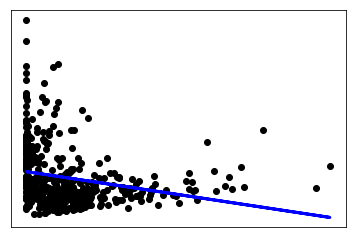

In [2]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from string import ascii_letters
import seaborn as sns

column_names = ['API','Surf_X','Surf_Y','Date_Drilling','Date_Completion','Date_Production','Lateral_Length','Depth_TVD_PPLS','Erosion_PPLS','Pressure_PPLS','TOC_PPLS','Vcarb_PPLS','Vsand_PPLS','Vclay_PPLS','PR_PPLS','YM_PPLS','RHOB_PPLS','Res_PPLS','GR_PPLS','DT_PPLS','DTs_PPLS','Temperature','Temp_Anomaly','S3Tect_PPLS','S3_contrast_PPLS','Heat_Flow','Zone','Nbr_Stages','Frac_Gradient','Proppant_Designed','Proppant_in_Formation','Avg_Breakdown_Pressure','Avg_Treating_Pressure','Max_Treating_pressure','Min_Treating_Pressure','Avg_Rate_Slurry','Max_Rate_Slurry','Min_Rate_Slurry','ShutInPressure_Fil','ShutInPressure_Initial','ISIP','Shot_Density','Shot_Total','Proppant_per_ft','Stage_Spacing','GasCum360','OilCum360']

#DataFrame de du document complet avec pour indice principal 'API'
df = pd.read_csv('TrainSample.csv', sep=";", header = None , names = column_names, skiprows=1, decimal=",")
df.set_index('API')

#dropna sers à retirer les lignes où les valeurs sont Null avec les caractéristiques mentionnées
df=df.dropna(subset=['ShutInPressure_Initial','GasCum360'])
X=df.ShutInPressure_Initial.values
Y=df.GasCum360.values
X = X.reshape(len(df.index), 1)
Y = Y.reshape(len(df.index), 1)
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#Affichage du scatterplot de 'ShutInPressure_Initial' en fonction de 'GasCum360'
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

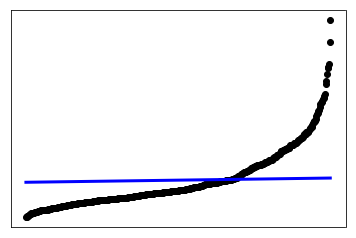

In [3]:
df=df.dropna(subset=['GasCum360'])
Y=df.GasCum360.values
X=np.linspace(1,np.shape(Y)[0],num=np.shape(Y)[0])
Y2=np.
X = X.reshape(len(df.index), 1)
Y = Y.reshape(len(df.index), 1)


#Affichage du scatterplot de 'ShutInPressure_Initial' en fonction de 'GasCum360'
plt.scatter(X, sorted(Y),  color='black')
plt.plot(X, , color='blue')
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
from sklearn.cluster import KMeans
#Crétation de cluster
kmeans = KMeans(n_clusters=4).fit(Y)
k=kmeans.predict(Y)
df2 = pd.DataFrame(k, index=df.API.values,columns=['Cluster'])

In [9]:
df3 = pd.concat([df,df2],axis=1, join_axes=[df.index])
df3 = df3.sort_values('GasCum360')